# Assignment # 01: Data Preprocessing and Visualization

# CS471: Machine Learning
### BESE-8 AB
### Instructors: Prof. Dr. Faisal Shafait, Dr. Muhammad Muneeb Ullah
#### Due Date: March 18, 2020

### Introduction

The Novel Coronavirus (COVID19) which causes respiratory illnesss was first detected in Wuhan, China. Since the disease is contagious, it has spread all over the world due to the high number of tourism and business visits to / from China. As you all are very well aware, COVID19 has been labelled as a global pandemic now by World Health Organization. Countries such as Italy, China, Qatar, USA, Saudi Arabia, etc, have cancelled most of the flights and a lockdown notice has been issued in Italy to avoid further wide-spread of the virus. 
Scientists all over the world are trying to drive insights from the datasets to come up with a possible prediction which will help with early diagnosis of COVID-19, estimating the spread, and the virus frequency and duration. 
Johns Hopkins University has made an excellent dashboard using the affected cases data. The dataset is made available at Kaggle and can be downloaded for the purpose of research.
For this assignment, we will use the Kaggle COVID-19 dataset (Download here: <a href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset" title="DATASET">DATASET</a>) and will try to learn some insights using the power of Machine Learning.
The Johns Hopkins University's web based dashboard can be accessed here:
<a href="https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6" title="Web Dashboard">Web Dashboard</a>

#### Question # 01

As you must have noticed, there are 6 files in the data you have downloaded from Kaggle.
For this question, we will use the main file `covid_19_data.csv`.
The steps to follow are given:
1. Read the data file and examine the features
2. Since the dataset is a bit sparse, clean the dataset by dropping rows which have missing points.
3. Print the initial 10 rows of the data.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def removeRows(df,column):
  df=df.fillna('~')
  q1_X_train = np.delete(df.values, [0], axis=0)
  col = q1_X_train[:,column]
  correct_i = np.where(col!='~')
  df = q1_X_train[correct_i]
  return df
  
df = removeRows(pd.read_csv("covid_19_data.csv", header=None),2)
df[:,[0,5,6,7]] = df[:,[0,5,6,7]].astype(float).astype(int)
q1 = df[:10]
print(q1)
col_1 = df[:,1]
col_2 = df[:,2]
col_3 = df[:,3]

[[1 '01/22/2020' 'Anhui' 'Mainland China' '1/22/2020 17:00' 1 0 0]
 [2 '01/22/2020' 'Beijing' 'Mainland China' '1/22/2020 17:00' 14 0 0]
 [3 '01/22/2020' 'Chongqing' 'Mainland China' '1/22/2020 17:00' 6 0 0]
 [4 '01/22/2020' 'Fujian' 'Mainland China' '1/22/2020 17:00' 1 0 0]
 [5 '01/22/2020' 'Gansu' 'Mainland China' '1/22/2020 17:00' 0 0 0]
 [6 '01/22/2020' 'Guangdong' 'Mainland China' '1/22/2020 17:00' 26 0 0]
 [7 '01/22/2020' 'Guangxi' 'Mainland China' '1/22/2020 17:00' 2 0 0]
 [8 '01/22/2020' 'Guizhou' 'Mainland China' '1/22/2020 17:00' 1 0 0]
 [9 '01/22/2020' 'Hainan' 'Mainland China' '1/22/2020 17:00' 4 0 0]
 [10 '01/22/2020' 'Hebei' 'Mainland China' '1/22/2020 17:00' 1 0 0]]


#### Question # 02

1. Rank the countries in the dataset in descending order according to the number of deaths.
2. Figure out the most affected provinces/states in top 3 countries with most number of Deaths.
3. Repeat the first two steps for Recovered and Confirmed cases as well.
4. Plot a bar graph for top 10 states in China and US in accordance to the death cases, and recovered cases.

In [0]:
def findCountries(countries, column):
  coun=list()
  for i in range(len(countries)):
    c_ind = np.where(col_3==countries[i])
    country_df = df[c_ind]
    unique_prov = np.unique(country_df[:,2])
    summ = 0
    for j in unique_prov:
      p_ind = np.where(col_2==j)[0][-1]
      summ += df[p_ind][column]
    coun.append(summ)

  ar = np.append([countries], [coun], axis=0)
  ar = np.transpose(ar)

  desc = ar[:,1].argsort()[::-1]
  return ar[desc]

def findProvinces(countries, column):
  coun=list()
  provinces = list()
  for i in countries[:3][:,0]:
    c_ind = np.where(col_3==i)
    country_df = df[c_ind]
    unique_prov = np.unique(country_df[:,2])
    for j in unique_prov:
      p_ind = np.where(col_2==j)[0][-1]
      provinces.append(j)
      coun.append(df[p_ind][column])

  ar = np.append([provinces], [coun], axis=0)
  ar = np.transpose(ar)

  desc = ar[:,1].astype(int).argsort()[::-1]
  return ar[desc]

def printRed(string): 
  print("\x1b[31m\"%s\"\x1b[0m"%(string))

In [0]:
countries_deaths_desc = findCountries(np.unique(df[:,3]), 6)
provinces_deaths_desc = findProvinces(countries_deaths_desc, 6)[:3]

printRed('Countries(Deaths)')
print(countries_deaths_desc)

printRed('Provinces(Deaths)')
print(provinces_deaths_desc)

"Countries(Deaths)"
[['Mainland China' 3249]
 ['France' 450]
 ['US' 267]
 ['UK' 186]
 ['Netherlands' 107]
 ['Canada' 12]
 ['Denmark' 9]
 ['Australia' 7]
 ['Hong Kong' 4]
 ['Taiwan' 1]
 ['Lebanon' 0]
 ['Iraq' 0]
 ['Germany' 0]
 ['Macau' 0]
 ['Others' 0]
 ['Austria' 0]
 ['Israel' 0]]
"Provinces(Deaths)"
[['Hubei' '3133']
 ['France' '450']
 ['Washington' '83']]


In [0]:
countries_recover_desc = findCountries(np.unique(df[:,3]), 7)
provinces_recover_desc = findProvinces(countries_recover_desc, 7)[:3]

printRed('Countries(Recovered Cases)')
print(countries_recover_desc)

printRed('Provinces(Recovered Cases)')
print(provinces_recover_desc)

"Countries(Recovered Cases)"
[['Mainland China' 71158]
 ['US' 161]
 ['Hong Kong' 98]
 ['UK' 85]
 ['Australia' 26]
 ['Taiwan' 17]
 ['Canada' 13]
 ['France' 12]
 ['Macau' 10]
 ['Netherlands' 2]
 ['Denmark' 1]
 ['Lebanon' 0]
 ['Others' 0]
 ['Iraq' 0]
 ['Germany' 0]
 ['Austria' 0]
 ['Israel' 0]]
"Provinces(Recovered Cases)"
[['Hubei' '58382']
 ['Guangdong' '1323']
 ['Henan' '1250']]


In [0]:
countries_confirm_desc = findCountries(np.unique(df[:,3]), 5)
provinces_confirm_desc = findProvinces(countries_confirm_desc, 5)[:3]

printRed('Countries(Confirmed Cases)')
print(countries_confirm_desc)

printRed('Provinces(Confirmed Cases)')
print(provinces_confirm_desc)

"Countries(Confirmed Cases)"
[['Mainland China' 80977]
 ['US' 19719]
 ['France' 12637]
 ['UK' 4470]
 ['Netherlands' 3003]
 ['Denmark' 1337]
 ['Canada' 980]
 ['Australia' 791]
 ['Hong Kong' 256]
 ['Others' 61]
 ['Taiwan' 47]
 ['Macau' 17]
 ['Germany' 5]
 ['Lebanon' 2]
 ['Iraq' 2]
 ['Austria' 2]
 ['Israel' 0]]
"Provinces(Confirmed Cases)"
[['Hubei' '67800']
 ['France' '12612']
 ['New York' '8310']]


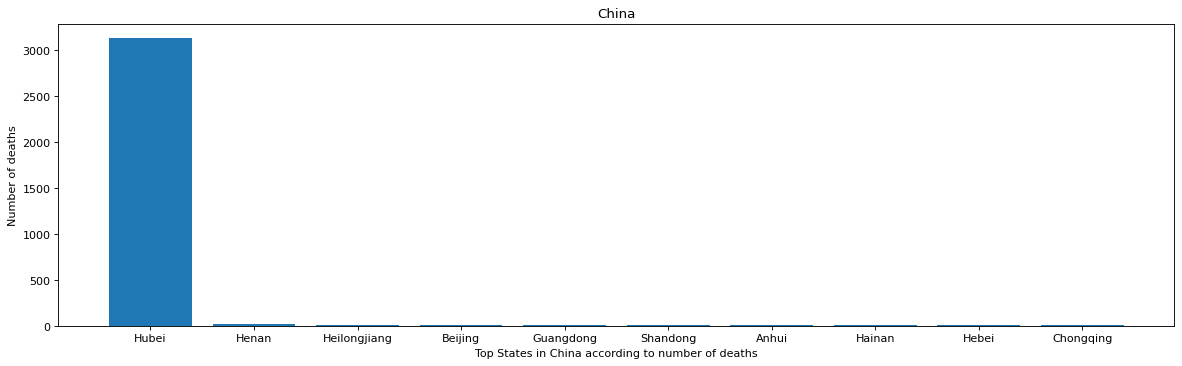

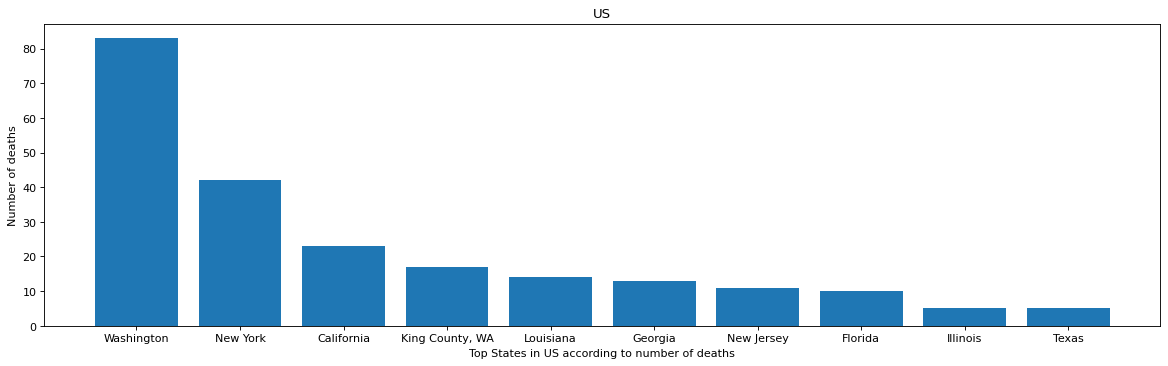

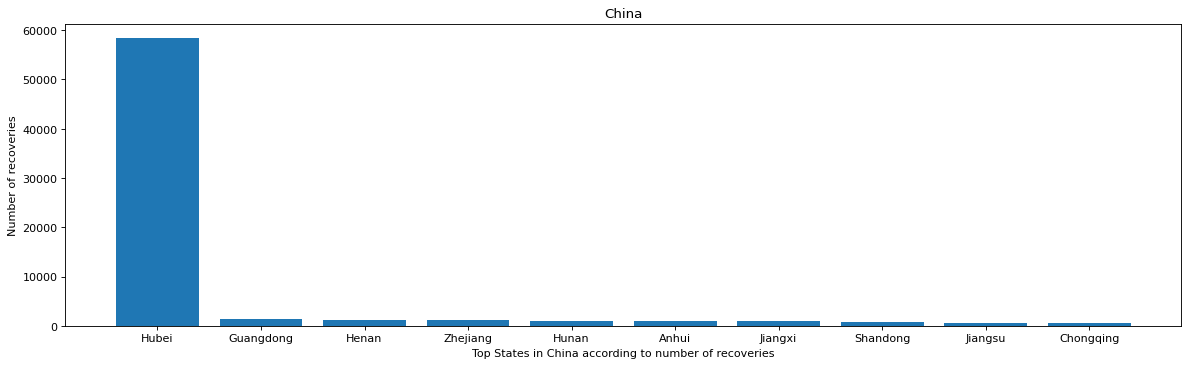

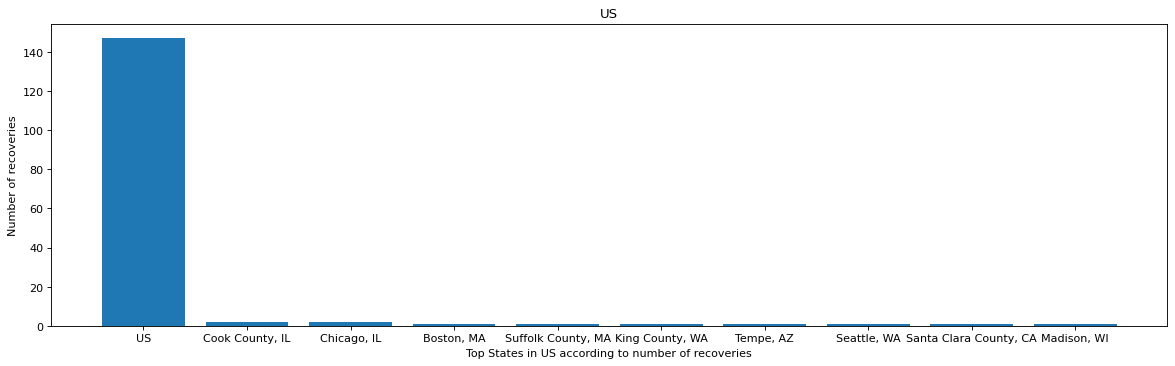

In [0]:
def plotBar(provinces,country,case):
  plt.figure(num=None, figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k')
  plt.bar(provinces[:,0],provinces[:,1].astype(int)) 
  plt.xlabel('Top States in %s according to number of %s'%(country,case))
  plt.ylabel('Number of %s'%(case))
  plt.title(country)
  plt.show()

cus = ['Mainland China','US']
china_death = findCountries([cus[0]], 6)
china_provinces_death = findProvinces(china_death, 6)[:10]

us_death = findCountries([cus[1]], 6)
us_provinces_death = findProvinces(us_death, 6)[:10]

china_rec = findCountries([cus[0]], 7)
china_provinces_recov = findProvinces(china_rec, 7)[:10]

us_rec = findCountries([cus[1]], 7)
us_provinces_recov = findProvinces(us_rec, 7)[:10]

plotBar(china_provinces_death,'China','deaths')
plotBar(us_provinces_death,'US','deaths')
plotBar(china_provinces_recov,'China','recoveries')
plotBar(us_provinces_recov,'US','recoveries')

#### Question # 03

Since we have dates in the data, let's quantify out how the virus has spread over time and which areas are most affected by the virus. This will help us figure out if the situation is getting any better over time or not.

1. Plot the confirmed, deaths and recovered cases as line graphs with dates for US, Iran and China each.
2. Looking at the plots, explain which country has seen a surge in confirmed, and death cases?
3. Work out the death rate due to COVID-19 in these three countries.
4. By examining the plots, which country has been able to efficiently and swiftly recover the confirmed cases? Work out the recovery rate for each country (US, Iran and China) and then answer the question?

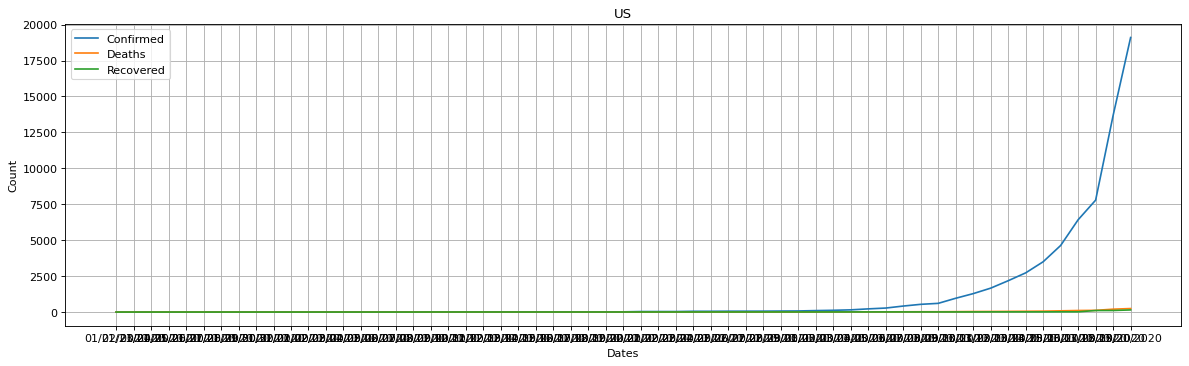

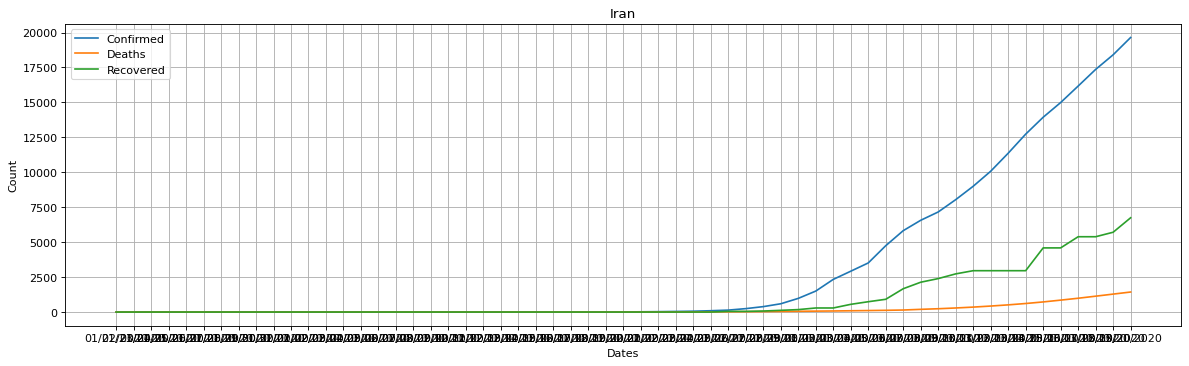

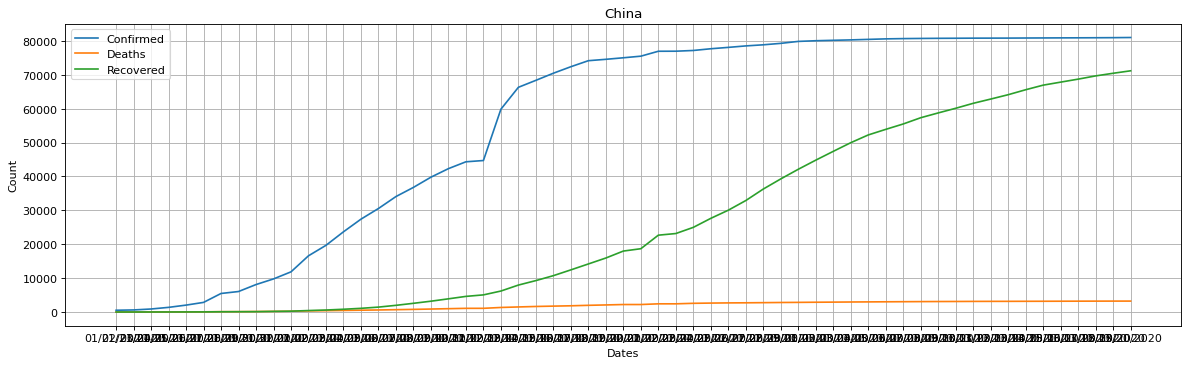

"Looking at the plots, we can see that US has a huge surge in confirmed cases while death cases in Iran has increased"


In [0]:
#Reading file again for all values
df = pd.read_csv("covid_19_data.csv", header=None)
df = np.delete(df.values, [0], axis=0)
df[:,[0,5,6,7]] = df[:,[0,5,6,7]].astype(float).astype(int)
col_1 = df[:,1]
col_3 = df[:,3]

dates = np.unique(col_1)

def countCases(country):
  c_coun=list()
  d_coun=list()
  r_coun=list()
  c_ind = np.where(col_3==country)
  cs = df[c_ind]
  col = cs[:,1]

  for i in dates:
    ind = np.where(col==i)
    c_sum = np.sum(cs[ind][:,5])
    d_sum = np.sum(cs[ind][:,6])
    r_sum = np.sum(cs[ind][:,7])
    c_coun.append(c_sum)
    d_coun.append(d_sum)
    r_coun.append(r_sum)
    
  ar = np.append([dates], [[c_coun], [d_coun], [r_coun]])
  ar = ar.reshape(4,len(dates)) 
  ar = np.transpose(ar)
  return ar

def plotCases(cases,country):
  plt.figure(num=None, figsize=(18, 5), dpi=80, facecolor='w', edgecolor='k')
  plt.plot(cases[:,0],cases[:,1])
  plt.plot(cases[:,0],cases[:,2])
  plt.plot(cases[:,0],cases[:,3])
  plt.title(country)
  plt.xlabel('Dates')
  plt.ylabel('Count')
  plt.legend(['Confirmed', 'Deaths', 'Recovered'], loc='upper left')
  plt.grid(True)
  plt.show()

us_cases = countCases('US')
iran_cases = countCases('Iran')
china_cases = countCases('Mainland China')

plotCases(us_cases,'US')
plotCases(iran_cases,'Iran')
plotCases(china_cases,'China')
printRed('Looking at the plots, we can see that US has a huge surge in confirmed cases while death cases in Iran has increased')

In [0]:
def rate(cases,col):
  return (cases[:,col][len(cases[:,col])-1] - cases[:,col][0])/len(cases[:,0])

us_rate = rate(us_cases,2)
iran_rate = rate(iran_cases,2)
china_rate = rate(china_cases,2)
print('Death rate for US: %f per day'%us_rate)
print('Death rate for Iran: %f per day'%iran_rate)
print('Death rate for China: %f per day'%china_rate)
print()

us_rate = rate(us_cases,3)
iran_rate = rate(iran_cases,3)
china_rate = rate(china_cases,3)
print('Recovery rate for US: %f per day'%us_rate)
print('Recovery rate for Iran: %f per day'%iran_rate)
print('Recovery rate for China: %f per day'%china_rate)
printRed('China has been able to efficiently and swiftly recover the confirmed cases')

Death rate for US: 4.135593 per day
Death rate for Iran: 24.288136 per day
Death rate for China: 54.779661 per day

Recovery rate for US: 2.491525 per day
Recovery rate for Iran: 114.322034 per day
Recovery rate for China: 1205.593220 per day
"China has been able to efficiently and swiftly recover the confirmed cases"


#### Question # 04

In this question, we will look at another data file namely `time_series_covid_19_deaths.csv`.
In this file, time series data of death occurred due to COVID-19 in countries/states/provinces is given.

1. Read the file and examine the features.
2. Clean the dataset by dropping missing rows with data points.
3. Since you already have information for States/Provinces in US, and China with most deaths, you can use those States/Provinces and plot the number of deaths against each of the top 5 states in both China and US.

In [0]:
df2 = removeRows(pd.read_csv("time_series_covid_19_deaths.csv", header=None),0)
df2[:,[2,3]] = df2[:,[2,3]].astype(float)
cols = np.arange(4,57)
df2[:,cols] = df2[:,cols].astype(float).astype(int)
col_0 = df2[:,0]

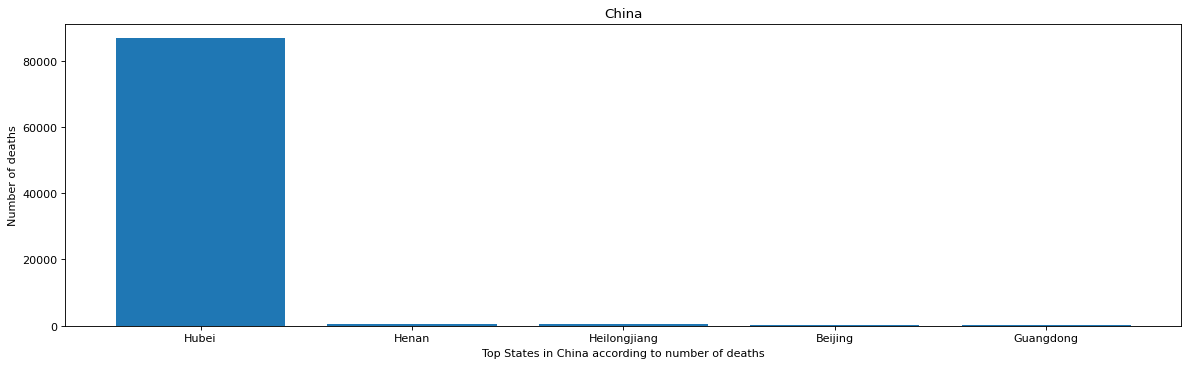

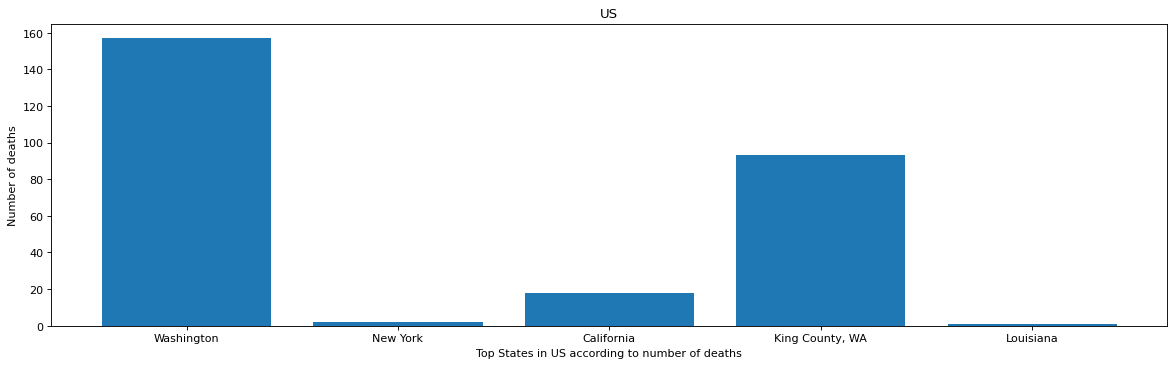

In [0]:
china_provinces = china_provinces_death[:5][:,0]
us_provinces = us_provinces_death[:5][:,0]

def calcDeaths(provinces):
  coun=list()
  for i in provinces:
    ind = np.where(col_0==i)
    coun.append(np.sum(df2[ind][:,cols]))    
  ar = np.append([provinces], [coun], axis=0)
  ar = np.transpose(ar)
  return ar

plotBar(calcDeaths(china_provinces),'China','deaths')
plotBar(calcDeaths(us_provinces),'US','deaths')

#### Question # 05

This aspect is interesting since we would get to work with Geographical Plots. You have the latitude and longitude data from the `time_series_covid_19_deaths.csv` data file. You will use that for this question.

We will use BaseMap library to plot the latitude and longitude points on the world map.
You can download BaseMap by running the following command in your terminal/command line prompt: 
```
pip3 install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
```

1. Once you have it installed, load up a basic world map and plot the values.
2. By visually examining, answer in which countries, the points scatter the most?

For reference and working directions with Basemap, you may take help from this video tutorial: <a href="https://www.youtube.com/watch?time_continue=114&v=XiZbrii49pI&feature=emb_title" BASEMAP >BASEMAP TUTORIAL</a>

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
from mpl_toolkits.basemap import Basemap

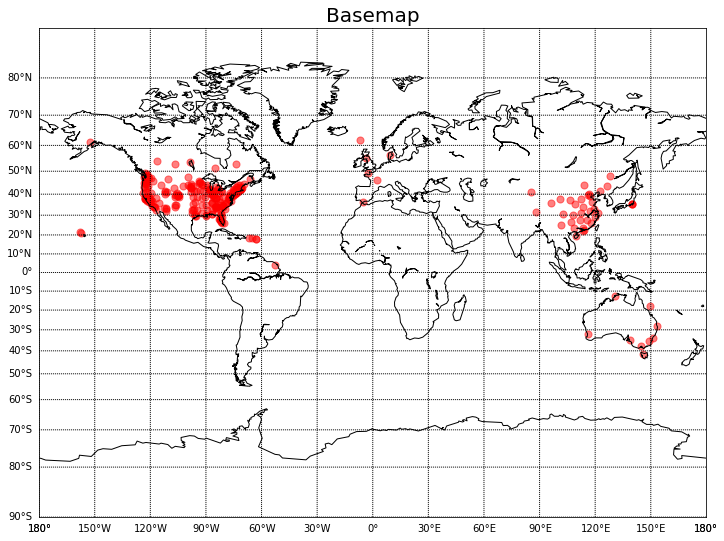

"The points scatter the most in US and China"


In [0]:
fig = plt.figure(figsize=(12,9))

m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

m.drawcoastlines()

m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])

sites_lat_y = df2[:,2]
sites_lon_x = df2[:,3]

m.scatter(sites_lon_x,sites_lat_y,latlon=True, c='red',s=50, marker='o', alpha=0.5)

plt.title('Basemap', fontsize=20)

plt.show()
printRed('The points scatter the most in US and China')

#### Question # 06

For this question, we will use the `COVID19_open_line_list.csv` file. 

1. Read the data file and examine the features
2. We will be working with these feature columns: `age, sex, symptoms, city, province, lives_in_Wuhan, and travel_history_location`.
3. Since these are textual values, you need to encode them to integers (maintain an encoding dictionary as well).
    * For example in `symptoms` column, you might assign fever -> 1, pneumonia -> 2, headache -> 3, etc.
    * There are several multiple symptoms as well for a single row, for those you can just sum the assigned integers. For example a row might list these symptons: fever, headache, since fever -> 1 and headache -> 3, you can replace fever, headache with 1+3 = 4 and so on. Start the integer encoding from 1 so that when summing the numbers, you donot get the same number back (e.g. 0+3 = 3).
    * You can do the same for other columns, just to avoid ambiguity, you can encode each column differently. 
    * For example, for the `symptoms` column, you starting assigning numbers from 1, let's say there were 4 symptoms, so the numbers would range from 1 - 4. For the next column, you can use numbers from 5 and so on. You are free to encode as you want. 
    * For ease, you can also use sklearn's LabelEncoder.
4. Once you have integer coded the entire dataset (7 columns), you can compute the correlation between city (let city column be `y` for this case) and every other column.
5. Pick the most 2 correlated fields (using the absolute value of correlations) and make `X`.
6. Use MinMaxScaler to scale X. Note that this will output a `np.array`. Make it a DataFrame again and rename the columns appropriately.
7. Print the head (5 rows) and tail (5 rows) of this dataframe.

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [0]:
def encoder(data, colnums):
  for i in colnums:
    col = data[:,i].astype(str)
    le.fit(col)
    data[:,i] = le.transform(col)
  return data

def npToDataframe(nump, headers, cols, type):
  data={}
  for i in cols:
    data.update({headers[i]:nump[:,i].astype(type)})
  return pd.DataFrame(data)

dataframe = pd.read_csv("COVID19_open_line_list.csv")
df_values = dataframe.values
headers = dataframe.columns
cols_encode = [1,2,3,4,13,14,16]
le = LabelEncoder()

df_encoded = encoder(df_values, cols_encode)
dataset = npToDataframe(df_encoded, headers, cols_encode, int)

corr_matrix = dataset.corr()['city'].abs()
corr_matrix = corr_matrix.sort_values(ascending=False)
print(corr_matrix)
col1 = corr_matrix[1:3].keys()[0]
col2 = corr_matrix[1:3].keys()[1]
printRed('We can see that the columns %s and %s and most closely correlated with city'%(col1, col2))

city                       1.000000
province                   0.253183
sex                        0.123058
age                        0.110645
travel_history_location    0.054016
symptoms                   0.052526
lives_in_Wuhan             0.042209
Name: city, dtype: float64
"We can see that the columns province and sex and most closely correlated with city"


In [0]:
scaler = MinMaxScaler()

age = dataset[col1].values
sex = dataset[col2].values

data = np.transpose([age,sex])
scaler.fit(data)
conv = npToDataframe(scaler.transform(data), [col1, col2], [0,1],float)
printRed('First 5 rows')
print(conv.head(5))
printRed('Last 5 rows')
print(conv.tail(5))

"First 5 rows"
   province  sex
0  0.033333  0.8
1  0.033333  0.8
2  0.033333  0.8
3  0.033333  0.6
4  0.033333  0.6
"Last 5 rows"
       province  sex
14121       1.0  1.0
14122       1.0  1.0
14123       1.0  1.0
14124       1.0  1.0
14125       1.0  1.0
